https://scikit-learn.org/stable/modules/clustering.html

https://datafai.com/2017/11/04/kmeans-clustering-with-python/

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

In [51]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
#Import CSV FIle
import numpy as np
import pandas as pd
df=pd.read_csv('cheese.csv')
df.head()
df.shape
print()

,RETAILER,VOLUME,DISP,PRICE
1,LOS ANGELES - LUCKY,21374,0.162000,2.578460
2,LOS ANGELES - RALPHS,6427,0.124113,3.727867
3,LOS ANGELES - VONS,17302,0.102000,2.711421
4,CHICAGO - DOMINICK,13561,0.027591,2.651206
5,CHICAGO - JEWEL,42774,0.090613,1.986674


(5555, 4)

In [52]:
#aggregate info on store level
df_pivot=pd.pivot_table(df,values=['VOLUME','DISP','PRICE'],index ='RETAILER',aggfunc=np.median)
df_pivot.head()
df_pivot.shape

,DISP,PRICE,VOLUME
RETAILER,,,
"ALBANY,NY - PRICE CHOPPER",0.000000,2.864821,717.0
ATLANTA - KROGER CO,0.030872,2.701700,4455.0
ATLANTA - WINN DIXIE,0.000000,2.692330,2848.0
BALTI/WASH - GIANT FOOD INC,0.000000,3.783658,4337.0
BALTI/WASH - SAFEWAY,0.000000,3.987125,3832.0


(88, 3)

In [54]:
#scale all variables between 0 and 1
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scld=MinMaxScaler(feature_range=(0,1))
arr_scld=scld.fit_transform(df_pivot)
df_scld=pd.DataFrame(arr_scld,columns=df_pivot.columns)
df_scld.head()
np.round(df_scld.describe(),2)
df_scld.shape
import warnings
warnings.filterwarnings('ignore')

,DISP,PRICE,VOLUME
0,0.000000,0.318908,0.017176
1,0.073857,0.250296,0.285807
2,0.000000,0.246355,0.170320
3,0.000000,0.705388,0.277327
4,0.000000,0.790969,0.241035


,DISP,PRICE,VOLUME
count,88.00,88.00,88.00
mean,0.20,0.34,0.25
std,0.23,0.21,0.20
min,0.00,0.00,0.00
25%,0.00,0.17,0.11
50%,0.10,0.25,0.22
75%,0.34,0.46,0.33
max,1.00,1.00,1.00


(88, 3)

In [59]:
#Lets build clusters
from sklearn.cluster import KMeans
num_of_clusters=range(2,10)
error=[]
for num_clusters in num_of_clusters:
    clusters=KMeans(num_clusters)
    clusters.fit(df_scld)
    error.append(clusters.inertia_/100)
df=pd.DataFrame({'Cluster_Numbers':num_of_clusters,'Error_Term':error})
df

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,Cluster_Numbers,Error_Term
0,2,0.09
1,3,0.06
2,4,0.04
3,5,0.04
4,6,0.03
5,7,0.03
6,8,0.02
7,9,0.02


<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'SSE')

Text(0.5, 1.0, 'Find the optimal number of cluster')

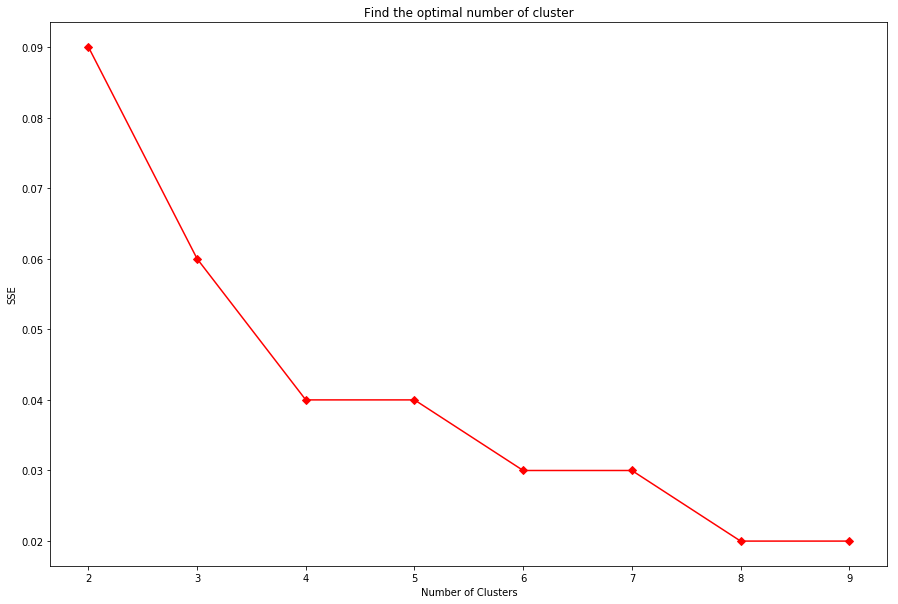

In [60]:
#find out the right number of clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(df.Cluster_Numbers,df.Error_Term,marker="D",color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Find the optimal number of cluster')
plt.show()

In [62]:
#Build with 4 Clusters
clusters=KMeans(4)
clusters.fit(df_scld)
clusters.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([0, 0, 0, 1, 1, 1, 3, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 2, 2, 3, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 3, 1, 2, 2, 0, 0, 0, 3, 2, 1,
       0, 0, 3, 3, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 3, 2, 2, 1, 2, 0, 2, 1, 3, 1, 0, 2, 0, 0, 0, 1])

In [65]:
df_pivot['Cluster']=clusters.labels_
df_pivot.head()
df_pivot.tail()
df_pivot.shape
np.round(df_pivot.describe(),2)

,DISP,PRICE,VOLUME,Cluster
RETAILER,,,,
"ALBANY,NY - PRICE CHOPPER",0.000000,2.864821,717.0,0
ATLANTA - KROGER CO,0.030872,2.701700,4455.0,0
ATLANTA - WINN DIXIE,0.000000,2.692330,2848.0,0
BALTI/WASH - GIANT FOOD INC,0.000000,3.783658,4337.0,1
BALTI/WASH - SAFEWAY,0.000000,3.987125,3832.0,1


,DISP,PRICE,VOLUME,Cluster
RETAILER,,,,
SYRACUSE - WEGMANS,0.227423,3.459383,807.0,2
TAMPA/ST. PETE - KASH N KARRY,0.000000,2.877614,3797.0,0
TAMPA/ST. PETE - PUBLIX,0.036500,2.769338,5021.0,0
TAMPA/ST. PETE - WINN DIXIE,0.014416,2.599700,5169.0,0
WICHITA - DILLON COMPANIES,0.000000,3.378888,1187.5,1


(88, 4)

,DISP,PRICE,VOLUME,Cluster
count,88.00,88.00,88.00,88.00
mean,0.08,2.91,3986.65,0.95
std,0.10,0.51,2839.54,1.00
min,0.00,2.11,478.00,0.00
25%,0.00,2.52,1948.88,0.00
50%,0.04,2.71,3509.00,1.00
75%,0.14,3.19,5015.75,2.00
max,0.42,4.48,14393.00,3.00


In [64]:
clust_profile=pd.pivot_table(df_pivot,values=['VOLUME','DISP','PRICE'],index='Cluster',aggfunc=np.mean)
np.round(clust_profile,2)
df_pivot.groupby('Cluster').size()

,DISP,PRICE,VOLUME
Cluster,,,
0,0.03,2.61,3417.47
1,0.05,3.54,2987.54
2,0.24,2.77,3463.58
3,0.08,2.75,10864.50


Cluster
0    38
1    24
2    18
3     8
dtype: int64